In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The float lenghts on a lot of these inputs is causing the output to end up in scientific notation
# Going to set a float cap to 3 decimal places for now. Can remove this if it's a problem.
pd.set_option('display.float_format', '{:.3f}'.format)
raw_df = pd.read_csv('nutritional-data.csv')

raw_df.shape

(89010, 61)

In [3]:
# Convert this to a long format so that we don't have a column for each year. 
# This drastically increases the number of rows, but makes the data much cleaner.
data_long = raw_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                      var_name='Year',
                      value_name='Amount')

data_long.shape

(5073570, 6)

In [4]:
data_long.sample(15)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Amount
2698003,Channel Islands,CHI,Female population 15-19,SP.POP.1519.FE,1990,4271.000
2202188,Panama,PAN,"Age population, age 20, male, interpolated",SP.POP.AG20.MA.IN,1984,22578.000
222377,Iceland,ISL,Number of maternal deaths,SH.MMR.DTHS,1962,NaN
2883101,El Salvador,SLV,"Prevalence of overweight, female (% of childre...",SH.STA.OWGH.FE.ZS,1992,NaN
3953176,Fiji,FJI,Male population 40-44,SP.POP.4044.MA,2004,28684.000
727255,Algeria,DZA,Use of insecticide-treated bed nets (% of unde...,SH.MLR.NETS.ZS,1968,NaN
3845098,Australia,AUS,Children (0-14) living with HIV,SH.HIV.0014,2003,100.000
110901,Bhutan,BTN,Low-birthweight babies (% of births),SH.STA.BRTW.ZS,1961,NaN
1656432,"Macao SAR, China",MAC,"Condom use, population ages 15-24, male (% of ...",SH.CON.1524.MA.ZS,1978,NaN
2656543,South Sudan,SSD,"Age population, age 15, male, interpolated",SP.POP.AG15.MA.IN,1989,63543.000


In [5]:
# There's still a lot of "NaN" in the Amount column so we drop those.

clean_long_df = data_long.dropna(subset=['Amount'])
clean_long_df.sample(25)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Amount
3225696,Benin,BEN,Prevalence of wasting (% of children under 5),SH.STA.WAST.ZS,1996,17.500
1201322,Iceland,ISL,"Age population, age 10, female, interpolated",SP.POP.AG10.FE.IN,1973,2265.000
3585347,Burundi,BDI,Female population 35-39,SP.POP.3539.FE,2000,158117.000
3175835,Mozambique,MOZ,Female population 50-54,SP.POP.5054.FE,1995,255738.000
4564617,Burundi,BDI,"Population, total",SP.POP.TOTL,2011,9790151.000
3770027,Curacao,CUW,Population ages 00-14 (% of total),SP.POP.0014.TO.ZS,2002,23.171
953347,Nicaragua,NIC,Female population 60-64,SP.POP.6064.FE,1970,20187.000
3005749,Puerto Rico,PRI,Female population 45-49,SP.POP.4549.FE,1993,115071.000
4004132,West Bank and Gaza,WBG,"Age population, age 25, female, interpolated",SP.POP.AG25.FE.IN,2004,27911.000
4806228,Zimbabwe,ZWE,"Age population, age 10, male, interpolated",SP.POP.AG10.MA.IN,2013,183637.000


In [6]:
# Figuring out the categegories we're working with.
unique_categories = sorted(clean_long_df['Indicator Name'].unique())
unique_categories

['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 'AIDS estimated deaths (UNAIDS estimates)',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Adults (ages 15+) and children (0-14 years) living with HIV',
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
 'Adults (ages 15+) living with HIV',
 'Adults (ages 15+) newly infected with HIV',
 'Age at first marriage, female',
 'Age at first marriage, male',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old',
 'Age dependency ratio, young',
 'Age population, age 0, female, interpolated',
 'Age population, age 0, male, interpolated',
 'Age population, age 01, female, interpolated',
 'Age population, age 01, male, i

In [16]:
# Male adult mortality rates
indicator_name = "Mortality rate, adult, male (per 1,000 male adults)"
year = "2014"

male_filtered_df = clean_long_df[(clean_long_df['Indicator Name'] == indicator_name) & (
    clean_long_df['Year'] == year)]

# Put them in order by Amount.
male_sorted_df = male_filtered_df.sort_values(by='Amount', ascending=False)

# We can cheat out the top/bottom 10 by using head/tail
male_top_10_countries = male_sorted_df.head(10)
male_bottom_10_countries = male_sorted_df.tail(10)

#Output
print("TOP 10: Mortality rate, adult, male (per 1,000 male adults):")
print(male_top_10_countries[['Country Name', 'Amount', 'Year']])
print("BOTTOM 10: Mortality rate, adult, male (per 1,000 male adults):")
print(male_bottom_10_countries[['Country Name', 'Amount', 'Year']])

TOP 10: Mortality rate, adult, male (per 1,000 male adults):
                     Country Name  Amount  Year
4858821                   Lesotho 580.548  2014
4885041                 Swaziland 575.768  2014
4881591              South Africa 464.093  2014
4867101                Mozambique 425.115  2014
4837086             Cote d'Ivoire 423.848  2014
4833636  Central African Republic 422.681  2014
4895391                  Zimbabwe 413.047  2014
4879176              Sierra Leone 406.904  2014
4833981                      Chad 387.931  2014
4870551                   Nigeria 378.566  2014
BOTTOM 10: Mortality rate, adult, male (per 1,000 male adults):
                 Country Name  Amount  Year
4825701               Bahrain  75.454  2014
4860891      Macao SAR, China  75.240  2014
4879521             Singapore  71.395  2014
4858476               Lebanon  71.358  2014
4838466                Cyprus  70.387  2014
4863306                 Malta  70.033  2014
4871241                Norway  69.472  

In [12]:
# Female adult mortality rates
female_indicator_name = "Mortality rate, adult, female (per 1,000 female adults)"
year = "2014"

female_filtered_df = clean_long_df[(clean_long_df['Indicator Name'] == female_indicator_name) & (
    clean_long_df['Year'] == year)]

# Put them in order by Amount.
female_sorted_df = female_filtered_df.sort_values(by='Amount', ascending=False)

# We can cheat out the top/bottom 10 by using head/tail
female_top_10_countries = female_sorted_df.head(10)
female_bottom_10_countries = female_sorted_df.tail(10)

# Output
print("TOP 10: Mortality rate, adult, female (per 1,000 female adults):")
print(female_top_10_countries[['Country Name', 'Amount', 'Year']])
print("BOTTOM 10: Mortality rate, adult, female (per 1,000 female adults):")
print(female_bottom_10_countries[['Country Name', 'Amount', 'Year']])

TOP 10: Mortality rate, adult, female (per 1,000 female adults):
                     Country Name  Amount  Year
4885040                 Swaziland 612.371  2014
4858820                   Lesotho 598.587  2014
4881590              South Africa 419.051  2014
4879175              Sierra Leone 398.862  2014
4837085             Cote d'Ivoire 387.870  2014
4867100                Mozambique 382.240  2014
4833635  Central African Republic 382.005  2014
4895390                  Zimbabwe 381.697  2014
4833980                      Chad 345.727  2014
4870550                   Nigeria 345.529  2014
BOTTOM 10: Mortality rate, adult, female (per 1,000 female adults):
                 Country Name  Amount  Year
4834670                 Chile  44.450  2014
4871240                Norway  43.500  2014
4834325       Channel Islands  43.195  2014
4885385                Sweden  42.586  2014
4863305                 Malta  40.818  2014
4879520             Singapore  39.322  2014
4860890      Macao SAR, China  

C:\Users\darks\AppData\Local\Temp\ipykernel_15840\3570498519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_long_df['Year'] = clean_long_df['Year'].astype(int)


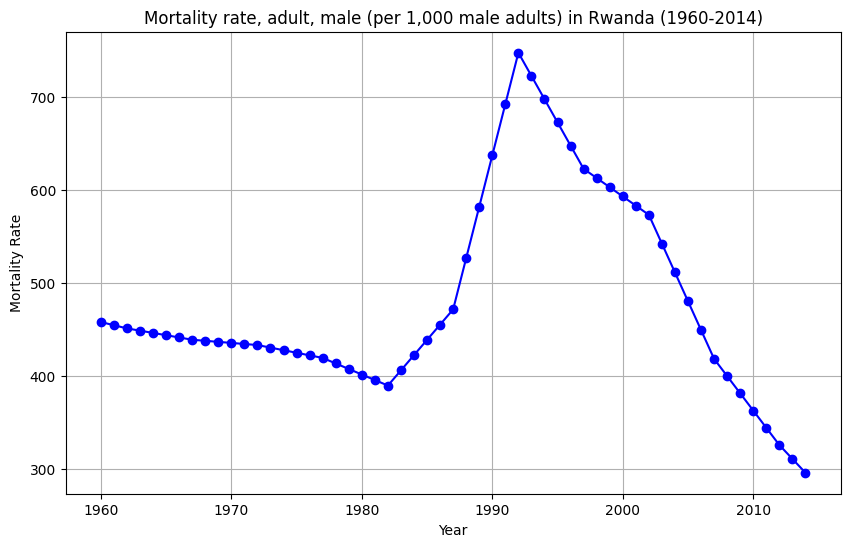

In [38]:
# For some reason the year was being stored as a string. 
clean_long_df['Year'] = clean_long_df['Year'].astype(int)

# Set the graph parameters here.
chart_indicator_name = "Mortality rate, adult, male (per 1,000 male adults)"
country_name = "Rwanda"

# Using .loc because I was getting a weird warning.
filtered_df = clean_long_df.loc[
    (clean_long_df['Indicator Name'] == indicator_name) &
    (clean_long_df['Country Name'] == country_name) &
    (clean_long_df['Year'] >= 1960) &
    (clean_long_df['Year'] <= 2014)
]

# Sort by year
filtered_df = filtered_df.sort_values(by='Year')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Year'], filtered_df['Amount'],
         marker='o', linestyle='-', color='b')
plt.title(f'{chart_indicator_name} in {
          country_name} (1960-2014)')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.grid(True)
plt.show()